# 1. Data wrangling
In this chapter, you'll learn to do three things with a table: filter for particular observations, arrange the observations in a desired order, and mutate to add or change a column. You'll see how each of these steps allows you to answer questions about your data.

## The gapminder dataset
This course will get you started on the path to exploring and visualizing your own data with the R programming language. This course introduces you to gapminder.

### tidyverse
`tidyverse` is a collection of data science tools within R for transforming and visualizing data. This is not the only set of tools in R, but it's a powerful and popular approach for exploring data. At every step, you'll be analyzing a real dataset called Gapminder.

### Gapminder
Gapminder tracks economic and social indicators like life expectancy and the GDP per capita of countries over time. The experience you gain on this example will help you in analyzing your own data. You'll learn to draw specific insights and communicate them through informative visualizations with the `ggplot2` package.

### Loading packages
R packages are tools that aren't built into the language, but were created later by other programmers. Each of them provides tools that you don't have to write yourself. 

The first package is `gapminder`, created by Jenny Bryan, which contains the dataset that you'll be analyzing. 

The second package is `dplyr`, created by Hadley Wickham, which provides step-by-step tools for transforming this data, such as filtering, sorting, and summarizing it. 

In [3]:
install.packages("gapminder")

package 'gapminder' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\sj501\AppData\Local\Temp\RtmpeqX2N5\downloaded_packages


In [6]:
install.packages("dplyr")

also installing the dependencies 'purrr', 'generics', 'tidyselect'




  There are binary versions available but the source versions are later:
         binary source needs_compilation
generics  0.1.0  0.1.1             FALSE
dplyr     1.0.6  1.0.7              TRUE

  Binaries will be installed
package 'purrr' successfully unpacked and MD5 sums checked
package 'tidyselect' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\sj501\AppData\Local\Temp\RtmpeqX2N5\downloaded_packages


installing the source package 'generics'



In [4]:
library(gapminder)

Warning message:
"package 'gapminder' was built under R version 3.6.3"

In [7]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



### The gapminder dataset
`gapminder` displays the contents of the gapminder object, which is structured as a data frame.

In [8]:
gapminder

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134
Afghanistan,Asia,1982,39.854,12881816,978.0114
Afghanistan,Asia,1987,40.822,13867957,852.3959
Afghanistan,Asia,1992,41.674,16317921,649.3414
Afghanistan,Asia,1997,41.763,22227415,635.3414


A data frame keeps rectangular data in rows and columns, similar to a spreadsheet, or a table in a SQL database. Most data analyses in R are centered around data frames.

It's important in an analysis to understand what each observation, or row, represents. Here, each represents a unique pair of a country and a year. For example, the first observation represents country statistics for Afghanistan in 1952, the second for Afghanistan in 1957, and so on. For each combination of a country and year, the dataset contains several variables, or columns, describing the country's demographics.

Seeing the continent - in this case, Asia - the life expectancy in years, the population, and the GDP per capita. The GDP per capita is the country's total economic output (Gross Domestic Product) divided by its population, and it's a common measure of how wealthy a country is. Each variable is of one consistent data type: some are numbers, like life expectancy and population, and some are categorical, like country and continent. For example, it can be seen that Afghanistan's life expectancy and population have both gone up from 1952 to 1997, but that its GDP per capita has wavered. 

---
## The filter verb
### Filtering for one year
A pipe is a percent, greater than, percent. It says "take whatever is before it, and feed it into the next step." 

After the pipe, we can perform our first verb. We have data on many years, but we'd like to filter for just one. Let's say we filter for 2007, the most recent data in the dataset. The "year equals equals 2007" is the condition we are using to filter observations. 

In [9]:
gapminder %>%
    filter(year == 2007)

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,2007,43.828,31889923,974.5803
Albania,Europe,2007,76.423,3600523,5937.0295
Algeria,Africa,2007,72.301,33333216,6223.3675
Angola,Africa,2007,42.731,12420476,4797.2313
Argentina,Americas,2007,75.320,40301927,12779.3796
Australia,Oceania,2007,81.235,20434176,34435.3674
Austria,Europe,2007,79.829,8199783,36126.4927
Bahrain,Asia,2007,75.635,708573,29796.0483
Bangladesh,Asia,2007,64.062,150448339,1391.2538
Belgium,Europe,2007,79.441,10392226,33692.6051


### Filtering for one country
You could choose another condition to filter on, besides the year. For example, suppose we wanted to get only the observations from the United States. We would write this as "filter country equals equals quote United States endquote", resulting in only the 12 observations from that country.

In [11]:
gapminder %>%
    filter(country == "United States")

country,continent,year,lifeExp,pop,gdpPercap
United States,Americas,1952,68.440,157553000,13990.48
United States,Americas,1957,69.490,171984000,14847.13
United States,Americas,1962,70.210,186538000,16173.15
United States,Americas,1967,70.760,198712000,19530.37
United States,Americas,1972,71.340,209896000,21806.04
United States,Americas,1977,73.380,220239000,24072.63
United States,Americas,1982,74.650,232187835,25009.56
United States,Americas,1987,75.020,242803533,29884.35
United States,Americas,1992,76.090,256894189,32003.93
United States,Americas,1997,76.810,272911760,35767.43


### Filtering for two variables
We can specify multiple conditions in the filter. Each of the conditions is separated by a comma: here we are saying we want only the one observation for the year 2007, comma, where the country is the United States. Each of these equals equals expressions is called an argument. This kind of double filter is useful for extracting a single observation you're interested in.

In [12]:
gapminder %>%
    filter(year == 2007, country == "United States")

country,continent,year,lifeExp,pop,gdpPercap
United States,Americas,2007,78.242,301139947,42951.65


## Exercise

In [13]:
# Filter the gapminder dataset for the year 1957
gapminder %>%
    filter(year == 1957)

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,1957,30.33200,9240934,820.8530
Albania,Europe,1957,59.28000,1476505,1942.2842
Algeria,Africa,1957,45.68500,10270856,3013.9760
Angola,Africa,1957,31.99900,4561361,3827.9405
Argentina,Americas,1957,64.39900,19610538,6856.8562
Australia,Oceania,1957,70.33000,9712569,10949.6496
Austria,Europe,1957,67.48000,6965860,8842.5980
Bahrain,Asia,1957,53.83200,138655,11635.7995
Bangladesh,Asia,1957,39.34800,51365468,661.6375
Belgium,Europe,1957,69.24000,8989111,9714.9606


In [14]:
# Filter for China in 2002
gapminder %>%
    filter(year == 2002, country == 'China')

country,continent,year,lifeExp,pop,gdpPercap
China,Asia,2002,72.028,1280400000,3119.281


---
## The arrange verb
`arrange` sorts the observations in a dataset, in ascending or descending order based on one of its variables. This is useful, for example, when you want to know the most extreme values in a dataset.

### Sorting with arrange
Just like filter, you use the `arrange` verb after the pipe operator. You would type gapminder, then the pipe operator- percent, greater than, percent- and then arrange. Within those parentheses, you tell it what column you want to arrange by. The observations are now sorted in ascending order, with the lowest GDP per capita appearing first. 

In [15]:
gapminder %>%
    arrange(gdpPercap)

country,continent,year,lifeExp,pop,gdpPercap
"Congo, Dem. Rep.",Africa,2002,44.966,55379852,241.1659
"Congo, Dem. Rep.",Africa,2007,46.462,64606759,277.5519
Lesotho,Africa,1952,42.138,748747,298.8462
Guinea-Bissau,Africa,1952,32.500,580653,299.8503
"Congo, Dem. Rep.",Africa,1997,42.587,47798986,312.1884
Eritrea,Africa,1952,35.928,1438760,328.9406
Myanmar,Asia,1952,36.319,20092996,331.0000
Lesotho,Africa,1957,45.047,813338,335.9971
Burundi,Africa,1952,39.031,2445618,339.2965
Eritrea,Africa,1957,38.047,1542611,344.1619


### Sorting in descending order
Arrange also lets you sort in descending order.

In [16]:
gapminder %>%
    arrange(desc(gdpPercap))

country,continent,year,lifeExp,pop,gdpPercap
Kuwait,Asia,1957,58.033,212846,113523.13
Kuwait,Asia,1972,67.712,841934,109347.87
Kuwait,Asia,1952,55.565,160000,108382.35
Kuwait,Asia,1962,60.470,358266,95458.11
Kuwait,Asia,1967,64.624,575003,80894.88
Kuwait,Asia,1977,69.343,1140357,59265.48
Norway,Europe,2007,80.196,4627926,49357.19
Kuwait,Asia,2007,77.588,2505559,47306.99
Singapore,Asia,2007,79.972,4553009,47143.18
Norway,Europe,2002,79.050,4535591,44683.98


### Filtering then arranging
Suppose you wanted to find the highest GDP-per-capita countries in just one year. To do that, you can combine the two verbs you've already learned: filter, and arrange. 

In [17]:
gapminder %>%
    filter(year == 2007) %>%
    arrange(desc(gdpPercap))

country,continent,year,lifeExp,pop,gdpPercap
Norway,Europe,2007,80.196,4627926,49357.19
Kuwait,Asia,2007,77.588,2505559,47306.99
Singapore,Asia,2007,79.972,4553009,47143.18
United States,Americas,2007,78.242,301139947,42951.65
Ireland,Europe,2007,78.885,4109086,40676.00
"Hong Kong, China",Asia,2007,82.208,6980412,39724.98
Switzerland,Europe,2007,81.701,7554661,37506.42
Netherlands,Europe,2007,79.762,16570613,36797.93
Canada,Americas,2007,80.653,33390141,36319.24
Iceland,Europe,2007,81.757,301931,36180.79


## Exercise

In [18]:
# Sort in ascending order of lifeExp
gapminder %>%
    arrange(lifeExp)

country,continent,year,lifeExp,pop,gdpPercap
Rwanda,Africa,1992,23.599,7290203,737.0686
Afghanistan,Asia,1952,28.801,8425333,779.4453
Gambia,Africa,1952,30.000,284320,485.2307
Angola,Africa,1952,30.015,4232095,3520.6103
Sierra Leone,Africa,1952,30.331,2143249,879.7877
Afghanistan,Asia,1957,30.332,9240934,820.8530
Cambodia,Asia,1977,31.220,6978607,524.9722
Mozambique,Africa,1952,31.286,6446316,468.5260
Sierra Leone,Africa,1957,31.570,2295678,1004.4844
Burkina Faso,Africa,1952,31.975,4469979,543.2552


In [19]:
# Sort in descending order of lifeExp
gapminder %>%
    arrange(desc(lifeExp))

country,continent,year,lifeExp,pop,gdpPercap
Japan,Asia,2007,82.603,127467972,31656.07
"Hong Kong, China",Asia,2007,82.208,6980412,39724.98
Japan,Asia,2002,82.000,127065841,28604.59
Iceland,Europe,2007,81.757,301931,36180.79
Switzerland,Europe,2007,81.701,7554661,37506.42
"Hong Kong, China",Asia,2002,81.495,6762476,30209.02
Australia,Oceania,2007,81.235,20434176,34435.37
Spain,Europe,2007,80.941,40448191,28821.06
Sweden,Europe,2007,80.884,9031088,33859.75
Israel,Asia,2007,80.745,6426679,25523.28


In [20]:
# Filter for the year 1957, then arrange in descending order of population
gapminder %>%
    filter(year == 1957) %>%
    arrange(desc(pop))

country,continent,year,lifeExp,pop,gdpPercap
China,Asia,1957,50.54896,637408000,575.9870
India,Asia,1957,40.24900,409000000,590.0620
United States,Americas,1957,69.49000,171984000,14847.1271
Japan,Asia,1957,65.50000,91563009,4317.6944
Indonesia,Asia,1957,39.91800,90124000,858.9003
Germany,Europe,1957,69.10000,71019069,10187.8267
Brazil,Americas,1957,53.28500,65551171,2487.3660
United Kingdom,Europe,1957,70.42000,51430000,11283.1779
Bangladesh,Asia,1957,39.34800,51365468,661.6375
Italy,Europe,1957,67.81000,49182000,6248.6562


---
## The mutate verb
Suppose you want to change one of the variables in your dataset, based on the other ones. Or suppose you want to add a new variable. For that, you would use the `mutate` verb. 

### Using mutate to change a variable
Inside this mutate statement, what's on the right of the equals sign is what's being calculated, and what's on the left is what's being replaced. Here, you're calculating pop slash one million. The slash in R performs division, so "population divided by one million". On the left, you're saying you want to replace the existing pop column, by writing pop equals. 

In [21]:
gapminder %>%
    mutate(pop = pop / 1000000)

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,1952,28.801,8.425333,779.4453
Afghanistan,Asia,1957,30.332,9.240934,820.8530
Afghanistan,Asia,1962,31.997,10.267083,853.1007
Afghanistan,Asia,1967,34.020,11.537966,836.1971
Afghanistan,Asia,1972,36.088,13.079460,739.9811
Afghanistan,Asia,1977,38.438,14.880372,786.1134
Afghanistan,Asia,1982,39.854,12.881816,978.0114
Afghanistan,Asia,1987,40.822,13.867957,852.3959
Afghanistan,Asia,1992,41.674,16.317921,649.3414
Afghanistan,Asia,1997,41.763,22.227415,635.3414


The result is the same table, but with pop replaced with a new value, one that's much smaller than it was before. This is how you manipulate existing variables in the table. That's often necessary during data processing and cleaning. Just like filter and arrange, you're not altering the original gapminder data, you're just changing the value in this new data frame that's being returned. 

### Using mutate to add a new variable
Alternatively, you may want to add a new variable. For instance, you currently have the GDP per capita: that's the Gross Domestic Product of the country divided by the current population. But in your analysis, you may want to know the total GDP. You'd have to multiply the population by the GDP per capita to find this. You would use mutate in almost the same way. 

In [22]:
gapminder %>%
    mutate(gdp = gdpPercap * pop)

country,continent,year,lifeExp,pop,gdpPercap,gdp
Afghanistan,Asia,1952,28.801,8425333,779.4453,6567086330
Afghanistan,Asia,1957,30.332,9240934,820.8530,7585448670
Afghanistan,Asia,1962,31.997,10267083,853.1007,8758855797
Afghanistan,Asia,1967,34.020,11537966,836.1971,9648014150
Afghanistan,Asia,1972,36.088,13079460,739.9811,9678553274
Afghanistan,Asia,1977,38.438,14880372,786.1134,11697659231
Afghanistan,Asia,1982,39.854,12881816,978.0114,12598563401
Afghanistan,Asia,1987,40.822,13867957,852.3959,11820990309
Afghanistan,Asia,1992,41.674,16317921,649.3414,10595901589
Afghanistan,Asia,1997,41.763,22227415,635.3414,14121995875


Notice that in the results, there's a brand new gdp column, which is much larger than the gdp per capita.

### Combining verbs
Suppose we wanted to know the countries with the highest total GDP in the year 2007. 

In [23]:
gapminder %>%
    mutate(gdp = gdpPercap * pop) %>%
    filter(year == 2007) %>%
    arrange(desc(gdp))

country,continent,year,lifeExp,pop,gdpPercap,gdp
United States,Americas,2007,78.242,301139947,42951.653,1.293446e+13
China,Asia,2007,72.961,1318683096,4959.115,6.539501e+12
Japan,Asia,2007,82.603,127467972,31656.068,4.035135e+12
India,Asia,2007,64.698,1110396331,2452.210,2.722925e+12
Germany,Europe,2007,79.406,82400996,32170.374,2.650871e+12
United Kingdom,Europe,2007,79.425,60776238,33203.261,2.017969e+12
France,Europe,2007,80.657,61083916,30470.017,1.861228e+12
Brazil,Americas,2007,72.390,190010647,9065.801,1.722599e+12
Italy,Europe,2007,80.546,58147733,28569.720,1.661264e+12
Mexico,Americas,2007,76.195,108700891,11977.575,1.301973e+12


## Exercise

In [24]:
# Use mutate to change lifeExp to be in months
gapminder %>%
    mutate(lifeExp = lifeExp * 12)

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,1952,345.612,8425333,779.4453
Afghanistan,Asia,1957,363.984,9240934,820.8530
Afghanistan,Asia,1962,383.964,10267083,853.1007
Afghanistan,Asia,1967,408.240,11537966,836.1971
Afghanistan,Asia,1972,433.056,13079460,739.9811
Afghanistan,Asia,1977,461.256,14880372,786.1134
Afghanistan,Asia,1982,478.248,12881816,978.0114
Afghanistan,Asia,1987,489.864,13867957,852.3959
Afghanistan,Asia,1992,500.088,16317921,649.3414
Afghanistan,Asia,1997,501.156,22227415,635.3414


In [25]:
# Use mutate to create a new column called lifeExpMonths
gapminder %>%
    mutate(lifeExpMonths = lifeExp * 12)

country,continent,year,lifeExp,pop,gdpPercap,lifeExpMonths
Afghanistan,Asia,1952,28.801,8425333,779.4453,345.612
Afghanistan,Asia,1957,30.332,9240934,820.8530,363.984
Afghanistan,Asia,1962,31.997,10267083,853.1007,383.964
Afghanistan,Asia,1967,34.020,11537966,836.1971,408.240
Afghanistan,Asia,1972,36.088,13079460,739.9811,433.056
Afghanistan,Asia,1977,38.438,14880372,786.1134,461.256
Afghanistan,Asia,1982,39.854,12881816,978.0114,478.248
Afghanistan,Asia,1987,40.822,13867957,852.3959,489.864
Afghanistan,Asia,1992,41.674,16317921,649.3414,500.088
Afghanistan,Asia,1997,41.763,22227415,635.3414,501.156


In [26]:
# Filter, mutate, and arrange the gapminder dataset
gapminder %>%
    filter(year == 2007) %>%
    mutate(lifeExpMonths = 12 * lifeExp) %>%
    arrange(desc(lifeExpMonths))

country,continent,year,lifeExp,pop,gdpPercap,lifeExpMonths
Japan,Asia,2007,82.603,127467972,31656.068,991.236
"Hong Kong, China",Asia,2007,82.208,6980412,39724.979,986.496
Iceland,Europe,2007,81.757,301931,36180.789,981.084
Switzerland,Europe,2007,81.701,7554661,37506.419,980.412
Australia,Oceania,2007,81.235,20434176,34435.367,974.820
Spain,Europe,2007,80.941,40448191,28821.064,971.292
Sweden,Europe,2007,80.884,9031088,33859.748,970.608
Israel,Asia,2007,80.745,6426679,25523.277,968.940
France,Europe,2007,80.657,61083916,30470.017,967.884
Canada,Americas,2007,80.653,33390141,36319.235,967.836


---
---
# 2. Data visualization
Often a better way to understand and present data as a graph. In this chapter, you'll learn the essential skills of data visualization using the ggplot2 package, and you'll see how the dplyr and ggplot2 packages work closely together to create informative graphs.

## Visualizing with ggplot2
### Data visualization
In this chapter, you'll learn the essential skill of data visualization using the ggplot2 package. In particular, this chapter will show you how to create scatterplots, like the one you see here, that compare two variables on an x- and y- axis. Visualization and data wrangling are often intertwined, so you'll see how the dplyr and ggplot2 packages work closely together to create informative graphs.

### Variable Assignment
In this chapter, you'll mostly be visualizing subsets of the gapminder dataset. For example, you'll often be visualizing only data from 2007. When you're working with just that subset, it's useful to save the filtered data, as a new data frame. 

In [27]:
gapminder_2007 <- gapminder %>%
    filter(year == 2007)

### Visualizing with ggplot2
Suppose you want to examine the relationship between a country's wealth and its life expectancy. You could do this with a scatterplot comparing two variables in our gapminder dataset: GDP per capita on the X axis and life expectancy on the y-axis. 

 You'll be creating this plot using the ggplot2 package. Just like the gapminder and dplyr packages, you'll have to load it with library parentheses ggplot2 end parentheses first. 

In [28]:
library(ggplot2)

This is the code to create this scatterplot. There are three parts to a ggplot graph. 

1. First is the data that we're visualizing. In this case, that is the `gapminder_2007` variable you just created. 
2. Second is the mapping of variables in your dataset to aesthetics in your graph. An aesthetic is a visual dimension of a graph that can be used to communicate information. In a scatterplot, your two dimensions are the x axis and the y axis, so you write `aes` (for "aesthetic"), parentheses, `x = gdpPercap`, `y = lifeExp`, telling it which variables to place on which axes. 
3. The third step is specifying the type of graph you're creating. You do that by adding a layer to the graph: use a plus after the ggplot, and then `geom_point`. The "geom" means you're adding a type of geometric object to the graph, the "point" indicates it's a scatter plot, where each observation corresponds to one point. 

Together, these three parts of the code- the data, the aesthetic mapping, and the layer- construct the scatter plot you see here. 

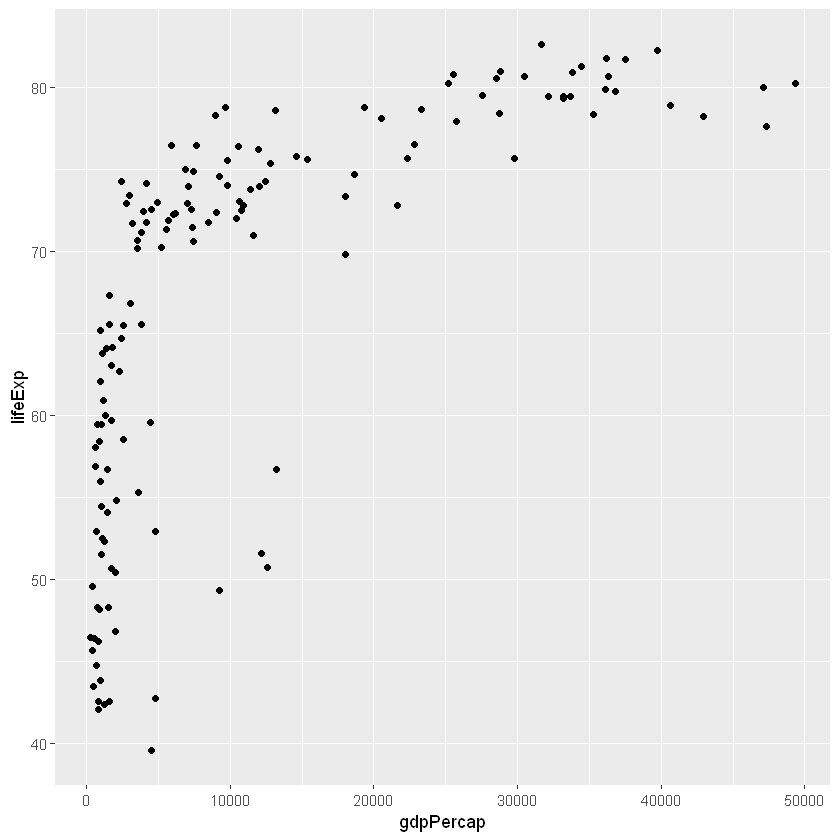

In [32]:
ggplot(gapminder_2007, aes(x = gdpPercap, y = lifeExp)) +
    geom_point()

## Exercise

In [33]:
# Create gapminder_1952
gapminder_1952 <- gapminder %>%
    filter(year == 1952)

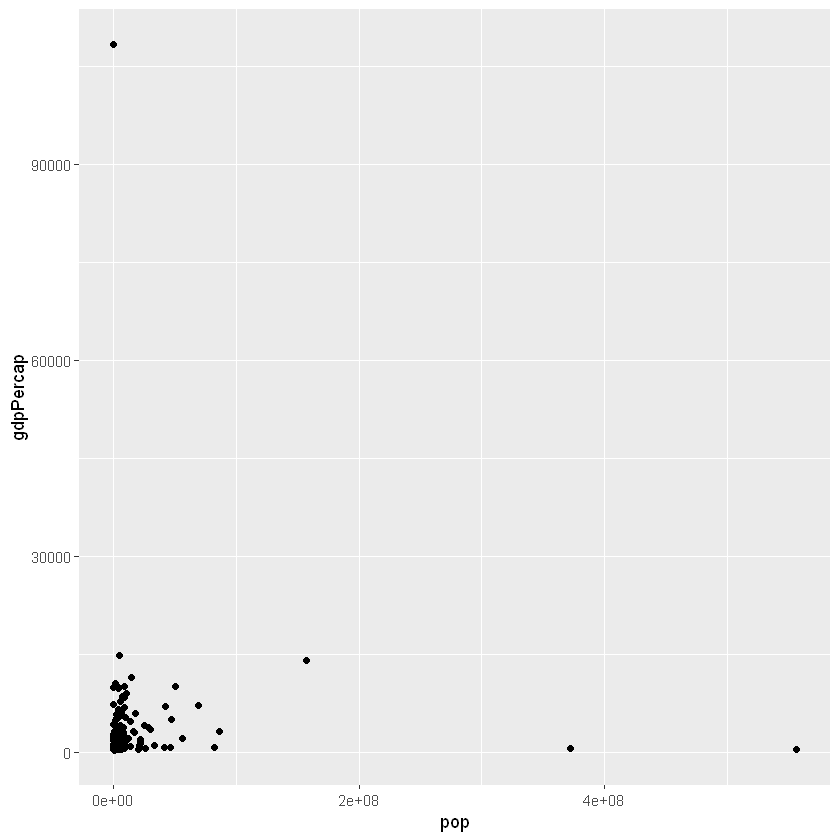

In [34]:
# Comparing population and GDP per capita
# Create a scatter plot with pop on the x-axis and gdpPercap on the y-axis
ggplot(gapminder_1952, aes(x = pop, y = gdpPercap)) +
  geom_point()

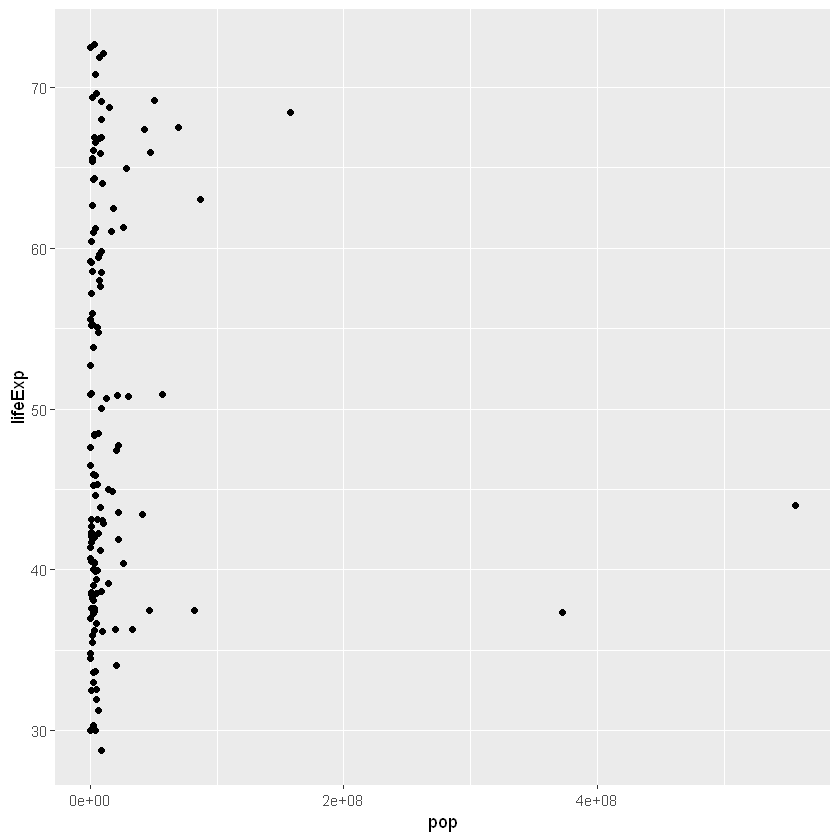

In [35]:
# Comparing population and life expectancy
# Create a scatter plot with pop on the x-axis and lifeExp on the y-axis
ggplot(gapminder_1952, aes(x = pop, y = lifeExp)) +
  geom_point()

*You might notice the points are crowded towards the left side of the plot, making them hard to distinguish.*

## Log scales

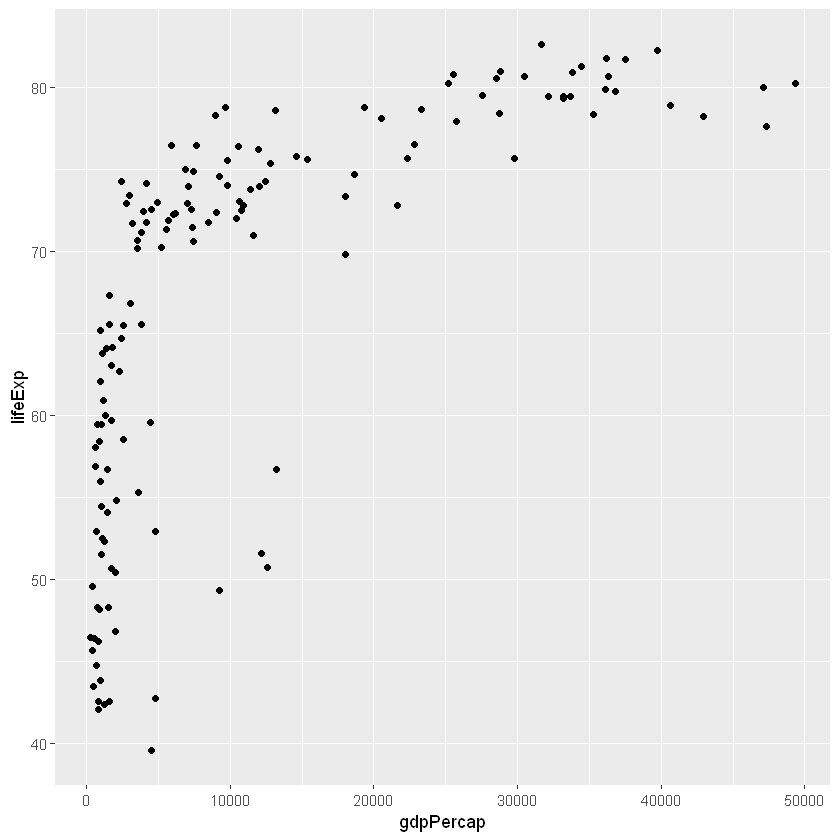

In [36]:
ggplot(gapminder_2007, aes(x = gdpPercap, y = lifeExp)) +
    geom_point()

This scatter plot comparing the GDP per capita of each country to its life expectancy. 

This plot communicates some interesting information: we can see that higher income countries tend to have higher life expectancy. 

One problem with this plot, however, is that a lot of countries get crammed into the leftmost part of the x-axis. This is because the distribution of GDP per capita spans several orders of magnitude, with some countries in the tens of thousands of dollars and others in the hundreds. When one of your axes has that kind of distribution, it's useful to work with a logarithmic scale - that is, a scale where each fixed distance represents a multiplication of the value.

### Log scale
This is what the scatter plot looks like when x is on a log scale. 

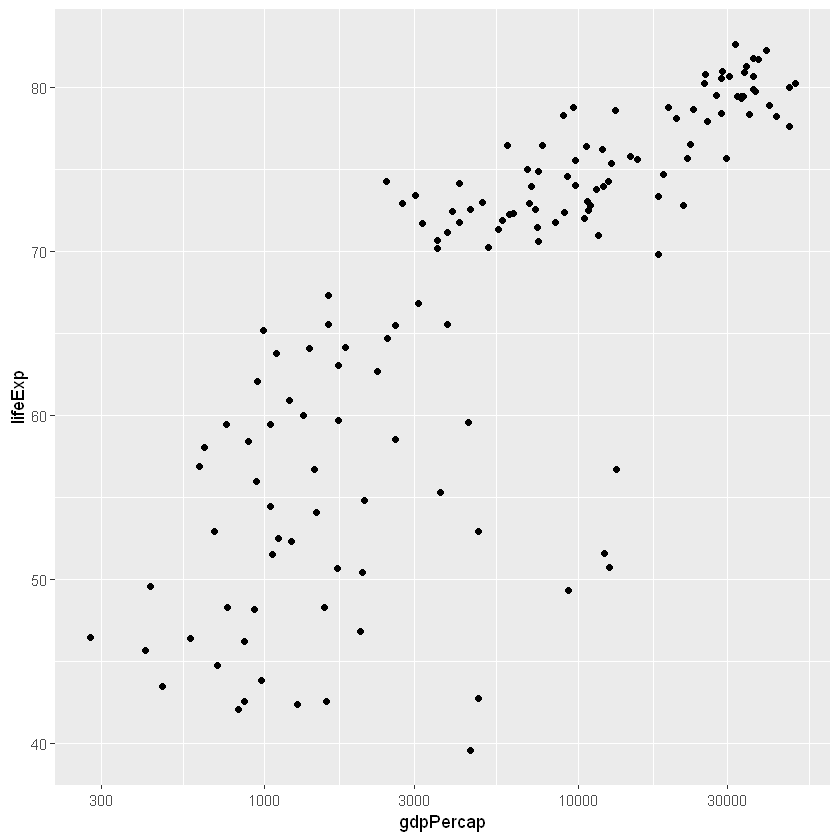

In [37]:
ggplot(gapminder_2007, aes(x = gdpPercap, y = lifeExp)) +
    geom_point() +
    scale_x_log10()

This is what the scatter plot looks like when x is on a log scale. This is the same data, but now each unit on the x-axis represents a change of 10 times the GDP. You can see the axis goes from one thousand to ten thousand, and the next step of an equal distance would be one hundred thousand. On this scale, the relationship between GDP per capita and life expectancy looks more linear: and you can more easily distinguish the countries at the lower end of the spectrum.

To create this graph, you would add one additional option to our ggplot call, with another "plus" after `geom_point`. You would add `scale_x_log10`. This is how you specify that we want the x axis on a log10 scale. 

It's not necessary in this case, but if you wanted to put the y-axis on a log scale as well, you would use `scale_y_log10`.

## Exercise

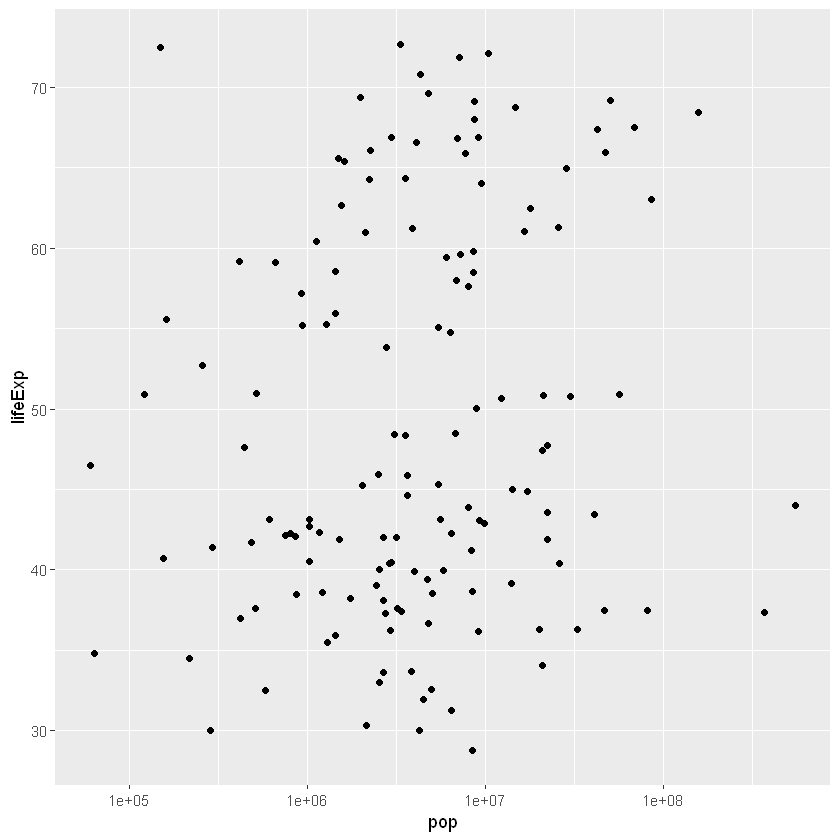

In [38]:
# Putting the x-axis on a log scale with gapminder_1952
ggplot(gapminder_1952, aes(x = pop, y = lifeExp)) +
  geom_point() +
  scale_x_log10()

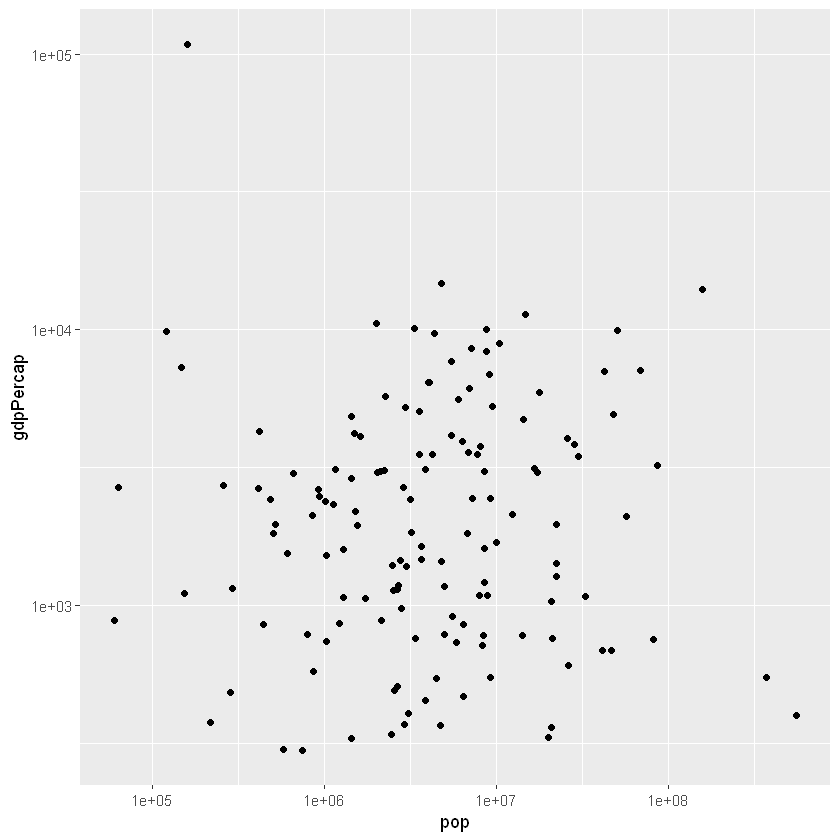

In [39]:
# Putting the x- and y- axes on a log scale
# Scatter plot comparing pop and gdpPercap, with both axes on a log scale
ggplot(gapminder_1952, aes(x = pop, y = gdpPercap)) +
  geom_point() +
  scale_x_log10() +
  scale_y_log10()

*Notice that the y-axis goes from 1e3 (1000) to 1e4 (10,000) to 1e5 (100,000) in equal increments.*

---
## Additional aesthetics
Now you'll learn to add two more aesthetics- color and size- to communicate even more information in your scatter plot. Continent is a categorical variable: it has a few specific values, such as Asia and Europe. A good way to represent a categorical variable in a scatterplot is the color of your points.

### The color aesthetic
To use this aesthetic, you add color equals continent inside the aes, next to x equals gdpPercap and y equals life expectancy.

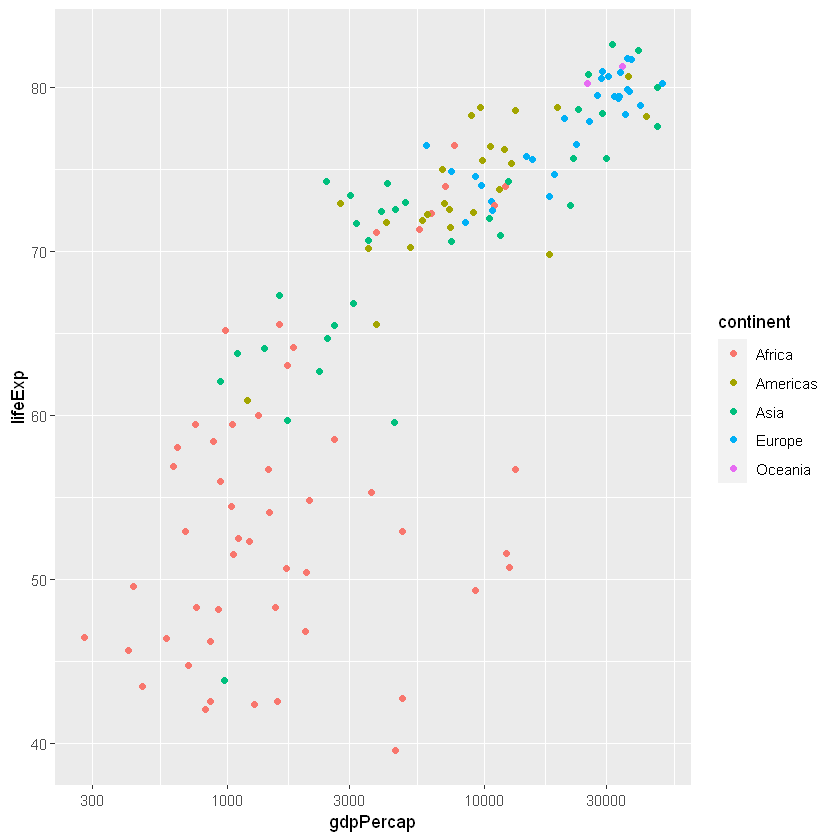

In [40]:
ggplot(gapminder_2007, aes(x = gdpPercap, y = lifeExp, color = continent)) +
    geom_point() +
    scale_x_log10()

This communicates a lot about differences between continents. The average life expectancy and GDP per capita tends to be lowest for African countries, shown in red, and highest for European countries, shown in blue. 

### The size aesthestic
Another variable you may want to include in the graph is population, represented by the pop variable in the dataset. This is a numeric variable, so a good way to represent it is with the size of the points in the scatterplot, with higher population countries getting larger points. 

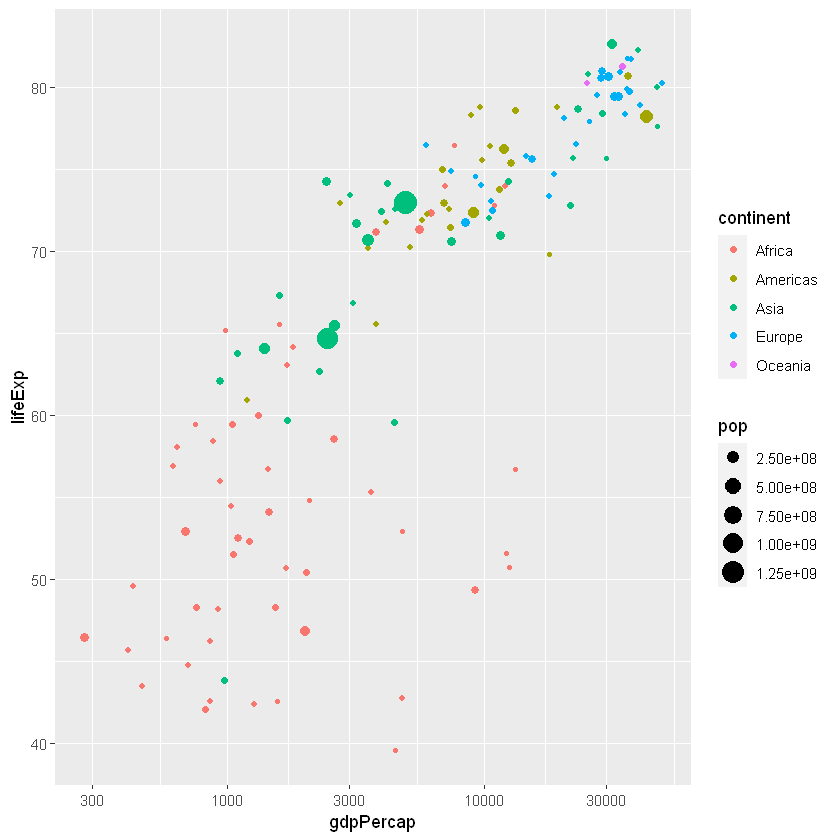

In [41]:
ggplot(gapminder_2007, aes(x = gdpPercap, y = lifeExp, color = continent, size = pop)) +
    geom_point() +
    scale_x_log10()

## Exercise

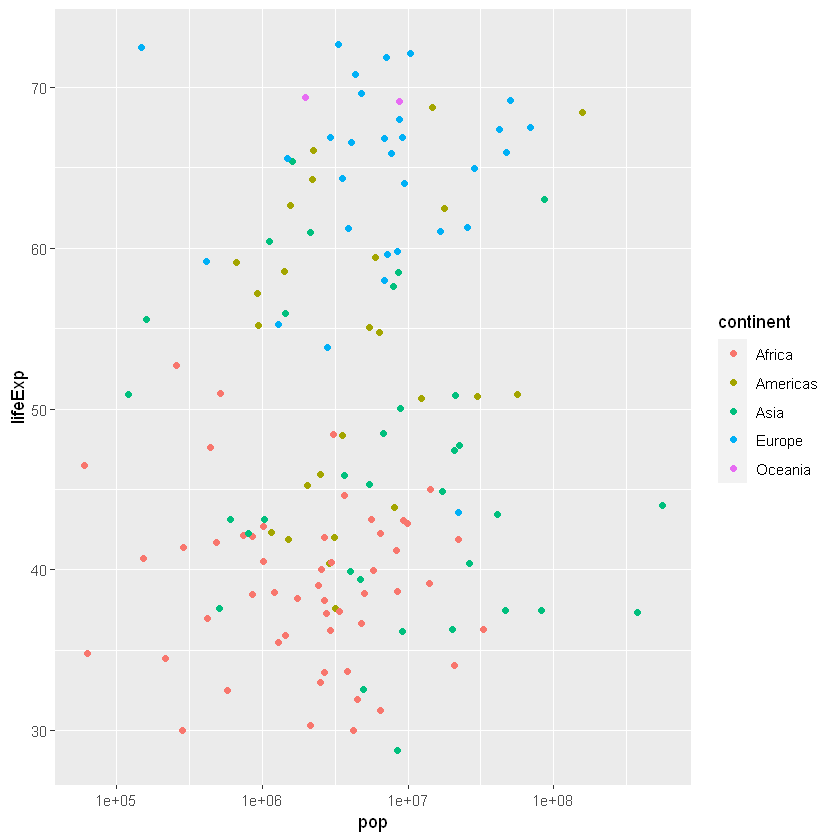

In [42]:
# Scatter plot comparing pop and lifeExp, with color representing continent
ggplot(gapminder_1952, aes(x = pop, y = lifeExp, color = continent)) +
  geom_point() +
  scale_x_log10()

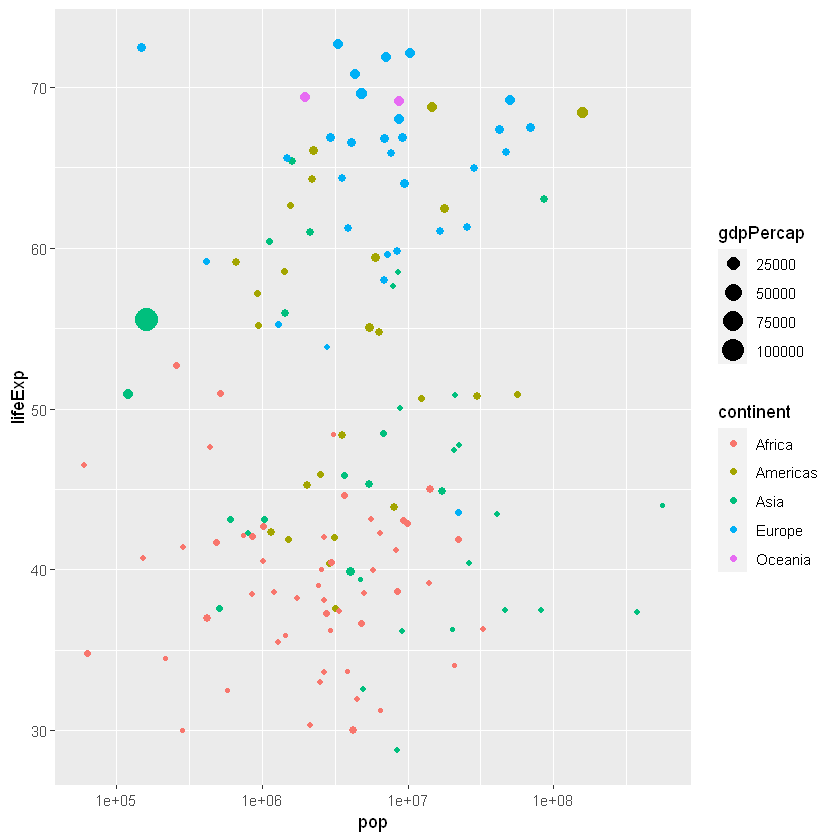

In [43]:
# Adding size and color to a plot
# Add the size aesthetic to represent a country's gdpPercap
ggplot(gapminder_1952, aes(x = pop, y = lifeExp, color = continent, size = gdpPercap)) +
  geom_point() +
  scale_x_log10()

---
## Faceting
Now you'll learn about another way to explore your data in terms of this kind of categorical variable.

`ggplot2` lets you divide your plot into subplots to get one smaller graph for each continent: Africa, the Americas, and so on. This is called faceting, and it's another powerful way to communicate relationships within your data. 

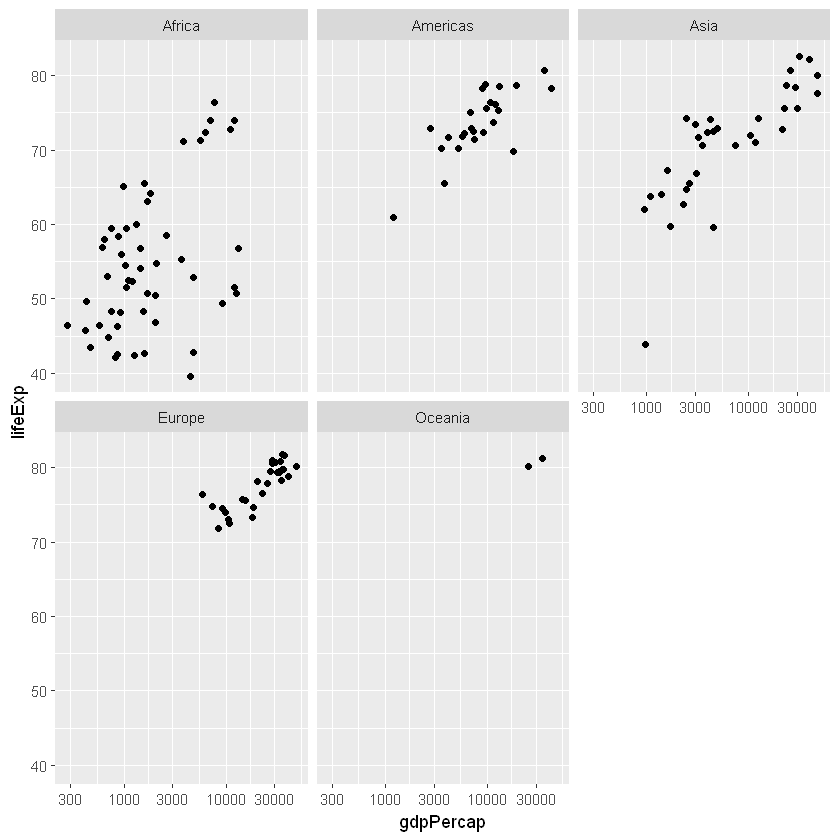

In [44]:
ggplot(gapminder_2007, aes(x = gdpPercap, y = lifeExp)) +
    geom_point() +
    scale_x_log10() +
    facet_wrap(~ continent)

In R, the tilde symbol(`~`) typically means "by", meaning that we're splitting the plot by continent. This tells `ggplot2` to divide the data into subplots based on the continent variable. 

## Exercise

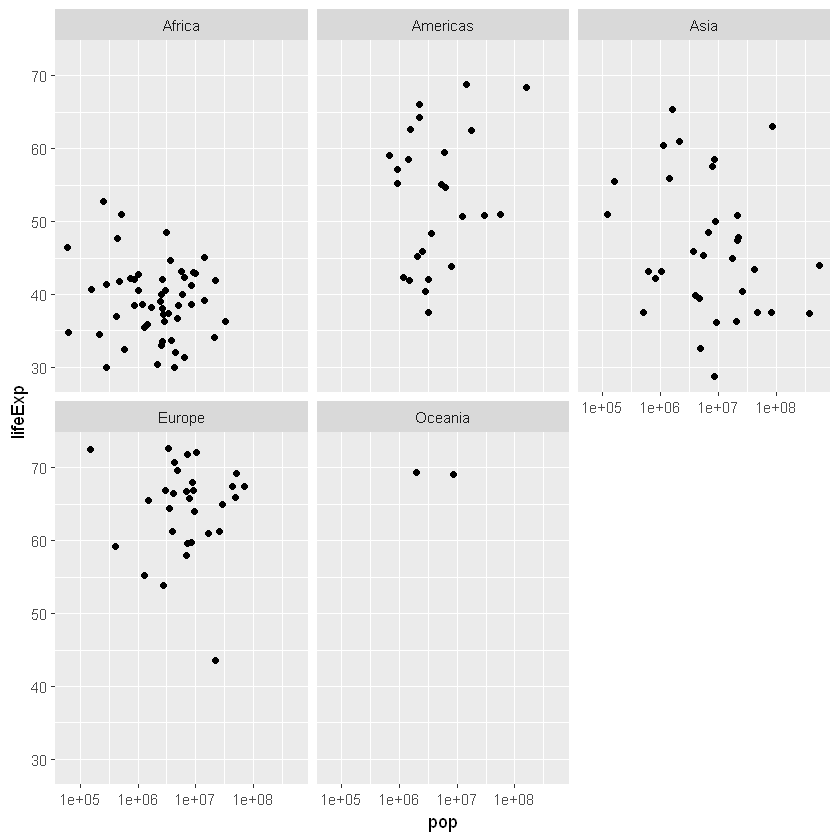

In [45]:
# Creating a subgraph for each continent
# Scatter plot comparing pop and lifeExp, faceted by continent
ggplot(gapminder_1952, aes(x = pop, y = lifeExp)) +
  geom_point() +
  scale_x_log10() +
  facet_wrap(~ continent)

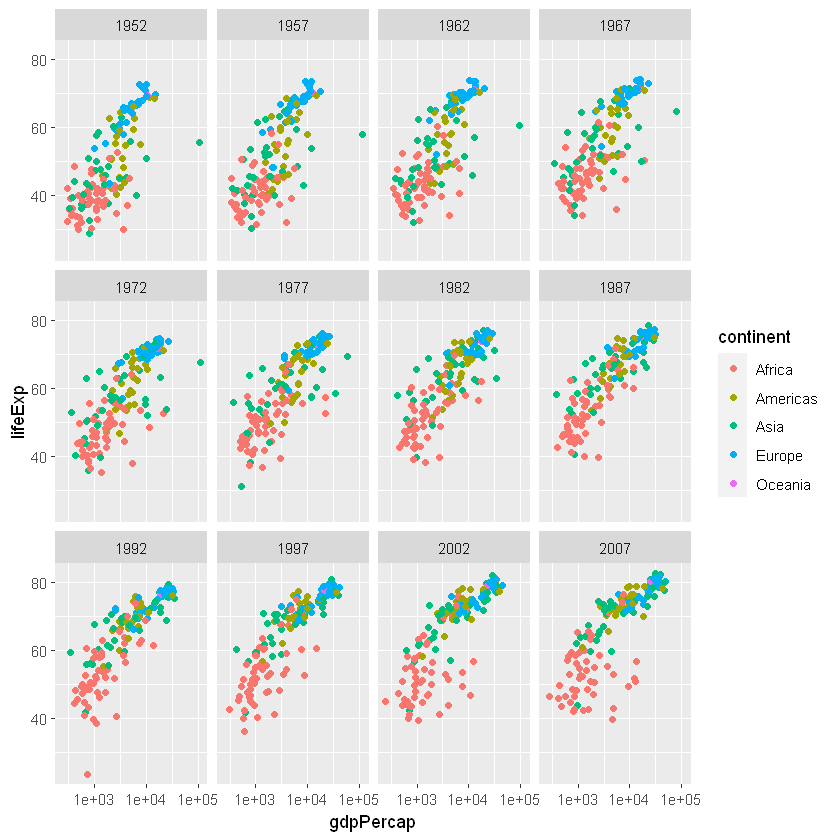

In [46]:
# Faceting by year
# Scatter plot comparing gdpPercap and lifeExp, with color representing continent
# and size representing population, faceted by year
ggplot(gapminder, aes(x = gdpPercap, y = lifeExp, color = continent)) +
    geom_point() +
    scale_x_log10() +
    facet_wrap(~ year)